# Pair Programming EDA III

## Objetivos

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:
📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

### 1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable 
import os

plt.rcParams["figure.figsize"] = (10,8)

In [133]:
df = pd.read_csv("datos/6.pandas_nuevascolumnas.csv",index_col=0)
df.head(2)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal,sexo
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,n,F
1,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,03-Jun-2018,Jun,y,M


### 2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

2.1 ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [134]:
df.columns

Index(['case_number', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'age', 'time', 'species_', 'href', 'injury', 'date',
       'mes', 'fatal', 'sexo'],
      dtype='object')

In [135]:
df["country"].value_counts()[0:10]

USA                 741
AUSTRALIA           343
SOUTH AFRICA        234
BAHAMAS              29
NEW ZEALAND          21
REUNION              17
BRAZIL               16
PAPUA NEW GUINEA     16
MEXICO               15
ITALY                11
Name: country, dtype: int64

In [136]:
valores = df["country"].value_counts()[0:10].keys()
valores

Index(['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'BAHAMAS', 'NEW ZEALAND', 'REUNION',
       'BRAZIL', 'PAPUA NEW GUINEA', 'MEXICO', 'ITALY'],
      dtype='object')

In [137]:
lista_valores = list(valores)
print(lista_valores)

['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'BAHAMAS', 'NEW ZEALAND', 'REUNION', 'BRAZIL', 'PAPUA NEW GUINEA', 'MEXICO', 'ITALY']


In [138]:
df_top = df[df["country"].isin(lista_valores)]

In [139]:
df_top["country"].unique()

array(['USA', 'BRAZIL', 'AUSTRALIA', 'SOUTH AFRICA', 'BAHAMAS',
       'NEW ZEALAND', 'REUNION', 'MEXICO', 'ITALY', 'PAPUA NEW GUINEA'],
      dtype=object)

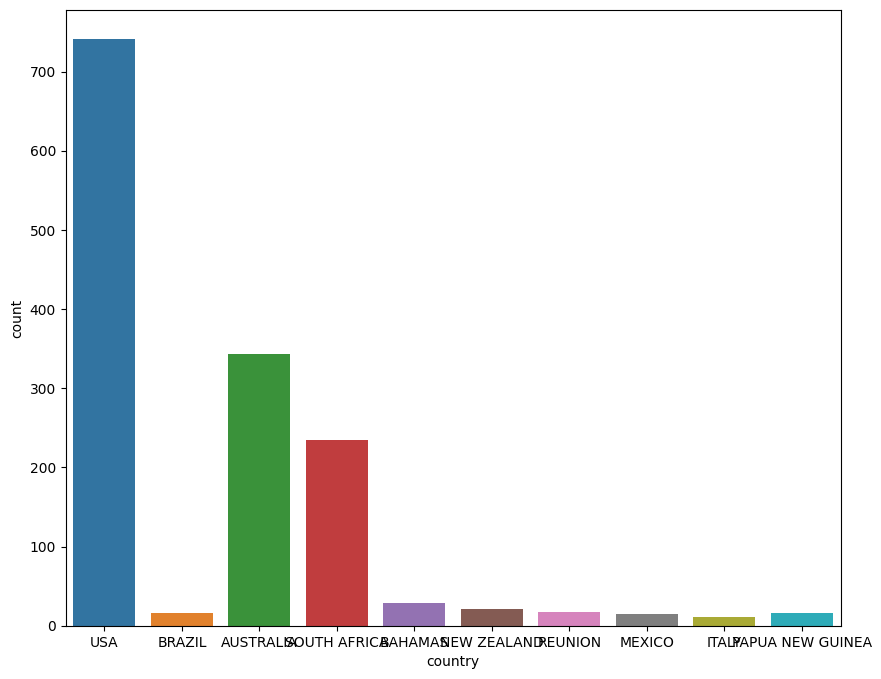

In [140]:
sns. countplot (x= "country" , data= df_top);

### 2.2 Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [141]:
df_top.columns

Index(['case_number', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'age', 'time', 'species_', 'href', 'injury', 'date',
       'mes', 'fatal', 'sexo'],
      dtype='object')

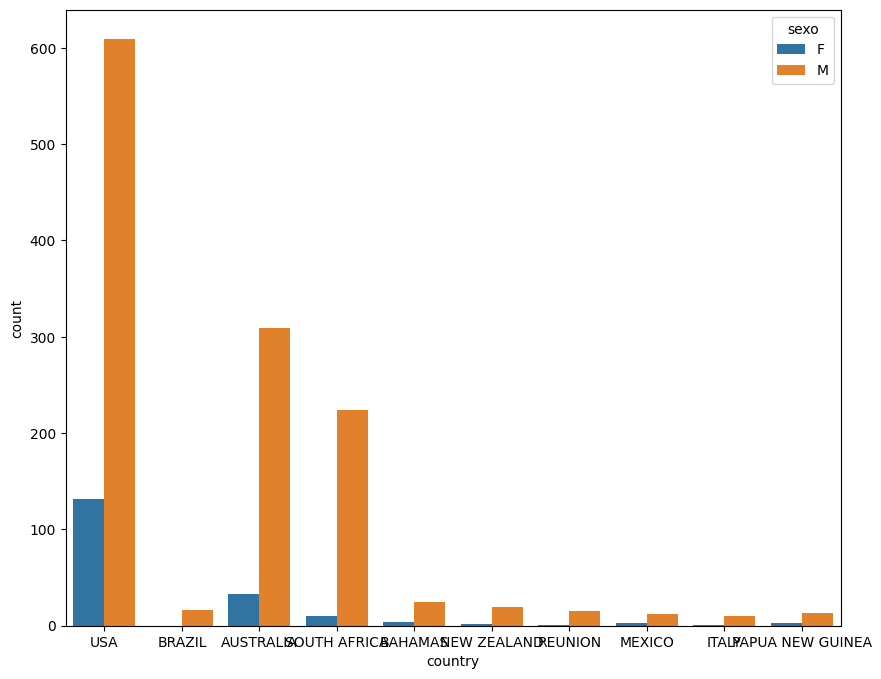

In [142]:
sns. countplot (x= "country" , data= df_top , hue= "sexo");

### 3. ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [207]:
df_top["age"].unique()

array(['57', '18', '15', '32', '60', '33', '19', '25', '10', '69', '55',
       '35', '20', '54', '31', '40', '37', '13', '34', '50', '46', '48',
       '17', '28', '65', '73', '58', '36', '60s', '51', '21', '61', '59',
       '42', '6', '27', '29', '22', '23', '39', '12', '11', '71', '43',
       '9', '44', '14', '62', '52', '38', '68', '16', '47', '63', '26',
       '70', '41', '40s', '53', '20s', '7', '66', '30', '24', '45', '74',
       '64', '8', '56', '49', 'Teen', '30s', '77', '8 or 10', '84',
       '\xa0 ', '30 or 36', '6½', '5', ' 30', ' 28', "60's", '67', '>50',
       '? & 19', '30 & 32', nan, 'young'], dtype=object)

In [205]:
# Se limpian los valores de la columna, convirtiendlos en un solo tipo para luego aplicar el método pd.cut
def cambiar_edad(col):
    
    try:
        return int(col)

    except:
        if type(col) == str:
            return 0
        
        else:
            return np.nan


In [183]:
# Creamos una nueva variable con la edad limpia
df_top["edad_limpia"] = df_top["age"].apply(cambiar_edad)

/tmp/ipykernel_488/455533189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["edad_limpia"] = df_top["age"].apply(cambiar_edad)


In [206]:
df_top.head(1)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal,sexo,mes_limpio,edad_limpia,age_bins
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,n,F,Jun,57.0,"(54.0, 60.0]"


In [204]:
# Se crea una columna con la categorías de edad

df_top["age_bins"] = pd.cut (df_top["edad_limpia"], 14 , right= True)

/tmp/ipykernel_488/3877224652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["age_bins"] = pd.cut (df_top["edad_limpia"], 14 , right= True)


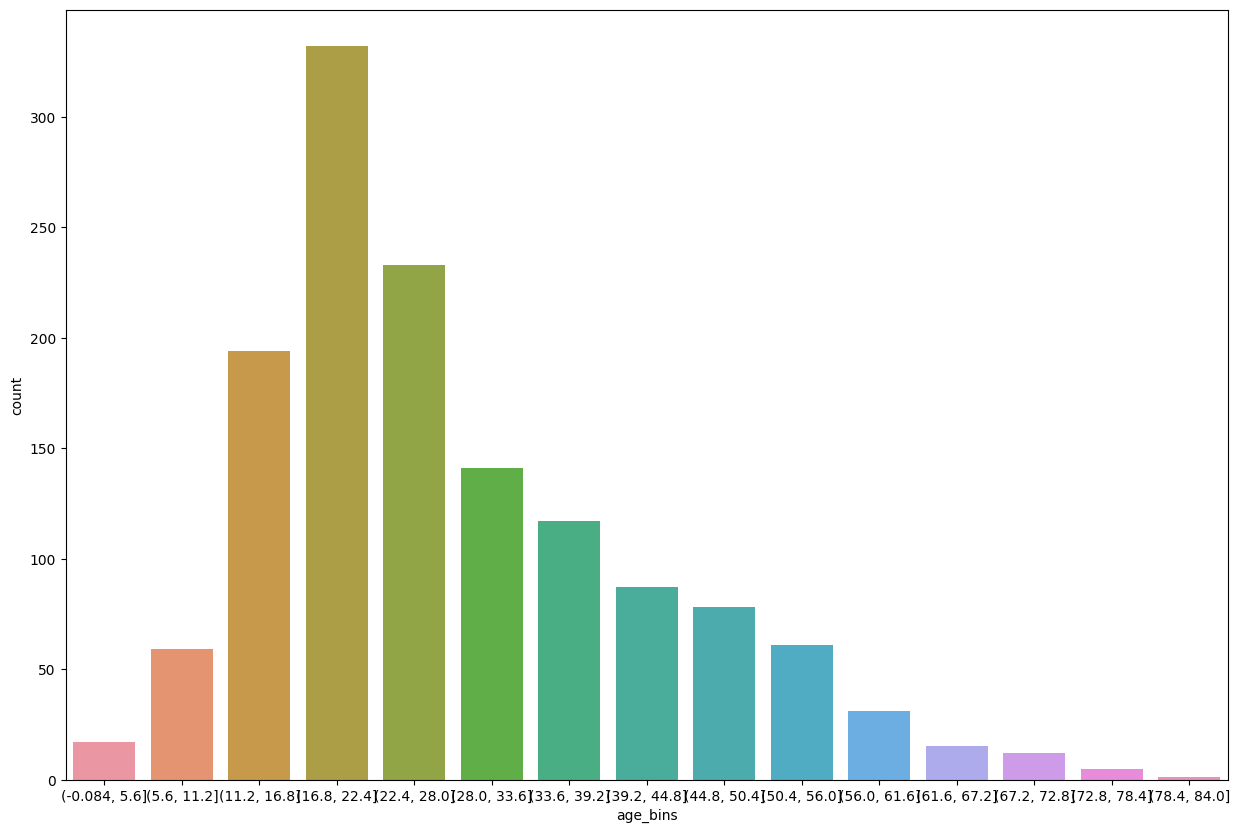

In [203]:
plt.figure(figsize=(15,10))
sns. countplot (x= "age_bins" , data= df_top)
plt.show;

### 3. Ataques entre sexos, ¿hay diferencia?

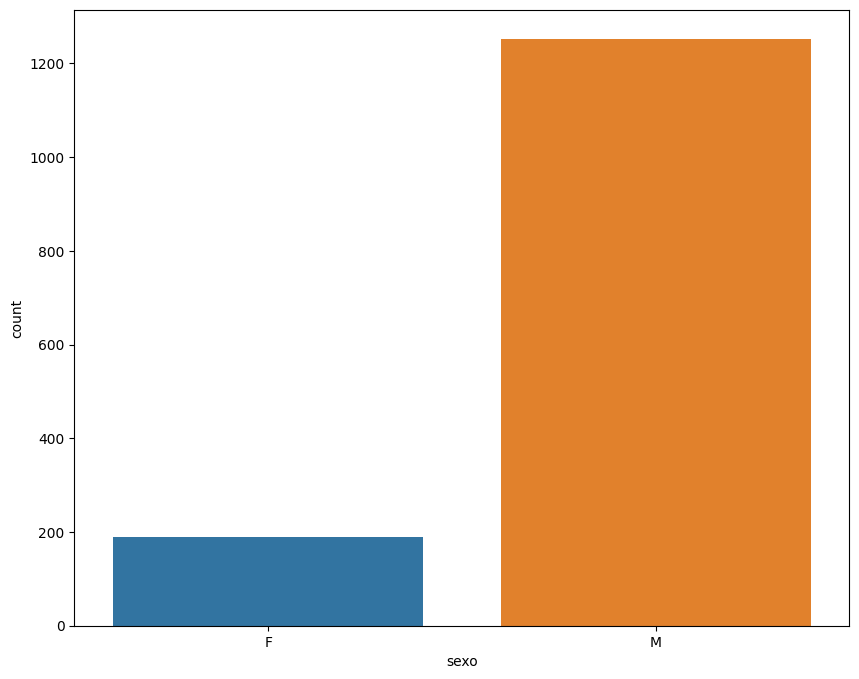

In [144]:
sns. countplot (x= "sexo" , data= df_top);

### 4. ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

In [145]:
df_top.head(2)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal,sexo
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,n,F
1,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,03-Jun-2018,Jun,y,M


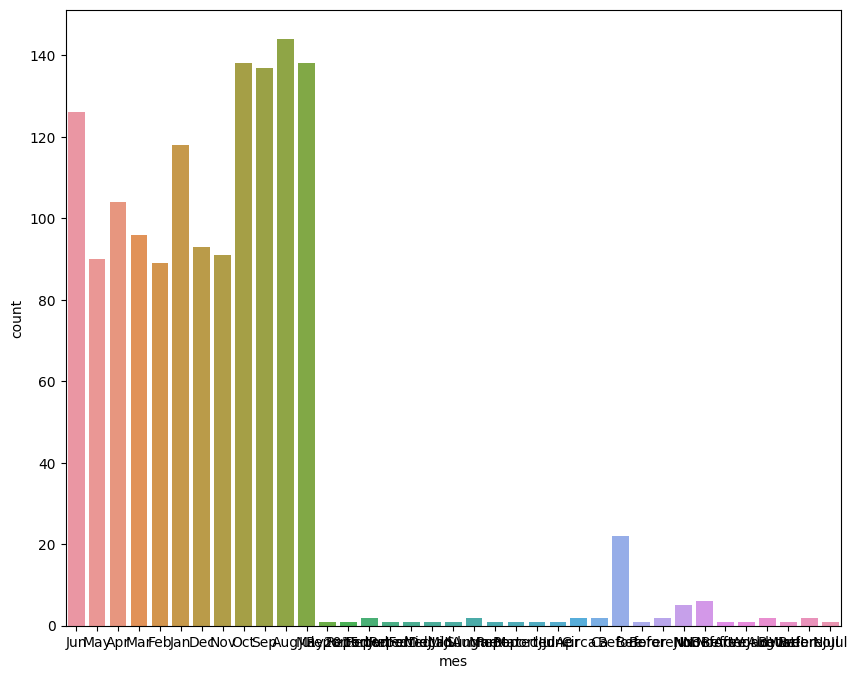

In [146]:
sns. countplot (x= "mes" , data= df_top);

In [147]:
df_top["mes"].unique()

array(['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul', 'May2015', 'ReportedJun', 'ReportedFeb', nan,
       'ReportedDec', 'ReportedJan', 'MidJulJul', 'MidAug', 'Summer',
       'MarMar', 'ReportedJul', 'ReportedApr', 'June', 'Circa', 'Ca',
       'Before', 'Beforer', 'BeforeJun', 'No', 'NoBefore', 'NoBeforeJan',
       'NoAfterAugust', 'WorldWarII', 'Between', 'BeforeJul', 'NoJul'],
      dtype=object)

In [148]:
# Hacemos una limpieza de la columna agrupando los datos en la opción "Unspecified"

def cambiar_mes(col):
    try:
        if col not in ['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul']:
            return "Unspecified"
        
        else:
            return col

    except:
            return np.nan

In [149]:
# Creamos una columna con la información limpia a través del método apply
df_top["mes_limpio"] = df_top["mes"].apply(cambiar_mes)

/tmp/ipykernel_488/11008378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["mes_limpio"] = df_top["mes"].apply(cambiar_mes)


In [150]:
df_top["mes_limpio"].unique()

array(['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul', 'Unspecified'], dtype=object)

In [208]:
df_top.head(2)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal,sexo,mes_limpio,edad_limpia,age_bins
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,n,F,Jun,57.0,"(54.0, 60.0]"
1,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,03-Jun-2018,Jun,y,M,Jun,18.0,"(12.0, 18.0]"


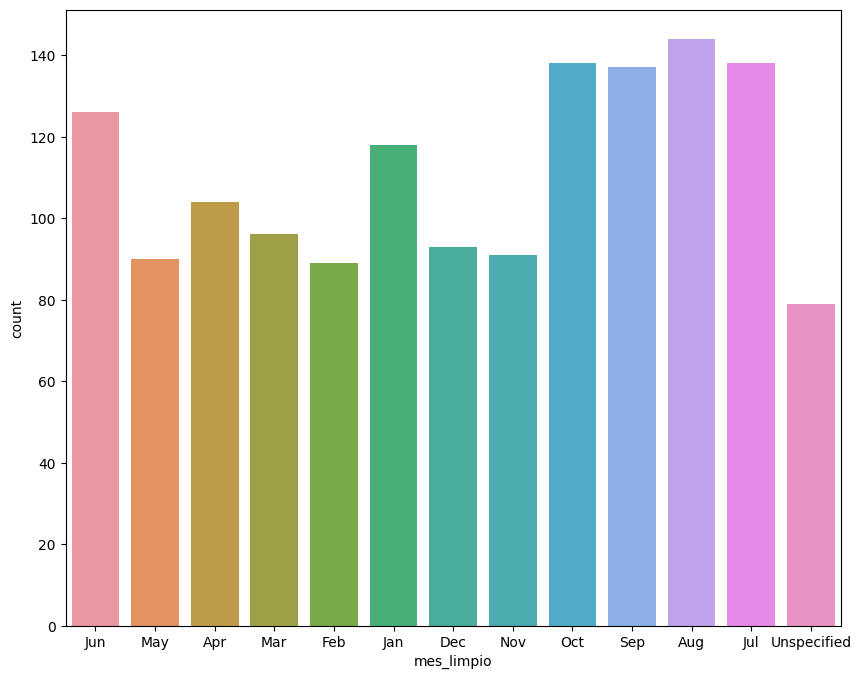

In [152]:
sns. countplot (x= "mes_limpio" , data= df_top);